# About The Data

##The data below represents weekly 2018 retail scan data for National retail volume (units) and price. Retail scan data comes directly from retailers’ cash registers based on actual retail sales of Hass avocados. Starting in 2013, the table below reflects an expanded, multi-outlet retail data set. Multi-outlet reporting includes an aggregation of the following channels: grocery, mass, club, drug, dollar and military. The Average Price (of avocados) in the table reflects a per unit (per avocado) cost, even when multiple units (avocados) are sold in bags. The Product Lookup codes (PLU’s) in the table are only for Hass avocados. Other varieties of avocados (e.g. greenskins) are not included in this table.

##Some relevant columns in the dataset:
#Date - The date of the observation
#AveragePrice - the average price of a single avocado
#type - conventional or organic
#year - the year
#Region - the city or region of the observation
#Total Volume - Total number of avocados sold
#4046 - Total number of avocados with PLU 4046 sold
#4225 - Total number of avocados with PLU 4225 sold
#4770 - Total number of avocados with PLU 4770 sold

# Importing essential libraries

In [43]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [44]:
#Reading the data
df=pd.read_csv("avocado.csv")
df.head()

,Sno,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,27-12-2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,20-12-2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,13-12-2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,06-12-2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,29-11-2015,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


Sno is not required for our analysis 

In [45]:
df=df.drop(columns="Sno")
df

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,27-12-2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.00,conventional,2015,Albany
1,20-12-2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.00,conventional,2015,Albany
2,13-12-2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.00,conventional,2015,Albany
3,06-12-2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.00,conventional,2015,Albany
4,29-11-2015,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.00,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1512,16-10-2016,1.39,190846.01,57529.11,56366.66,17531.78,59418.46,48823.53,10354.65,240.28,conventional,2016,Charlotte
1513,09-10-2016,1.51,178235.75,43325.87,52189.61,19419.57,63300.70,54704.14,8596.56,0.00,conventional,2016,Charlotte
1514,02-10-2016,1.48,178410.82,46364.75,52893.38,16736.92,62415.77,53332.61,8258.16,825.00,conventional,2016,Charlotte
1515,25-09-2016,1.47,189131.52,54110.79,53593.58,17495.42,63931.73,55653.47,8278.26,0.00,conventional,2016,Charlotte


In [46]:
#Checking null values
df.isnull().sum()

Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

We have no null values. 

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1517 entries, 0 to 1516
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          1517 non-null   object 
 1   AveragePrice  1517 non-null   float64
 2   Total Volume  1517 non-null   float64
 3   4046          1517 non-null   float64
 4   4225          1517 non-null   float64
 5   4770          1517 non-null   float64
 6   Total Bags    1517 non-null   float64
 7   Small Bags    1517 non-null   float64
 8   Large Bags    1517 non-null   float64
 9   XLarge Bags   1517 non-null   float64
 10  type          1517 non-null   object 
 11  year          1517 non-null   int64  
 12  region        1517 non-null   object 
dtypes: float64(9), int64(1), object(3)
memory usage: 154.2+ KB


Apart from date and region our data is numerical in nature.

In [48]:
#changing date to datetime format
df['Date']=pd.to_datetime(df['Date'])

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1517 entries, 0 to 1516
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          1517 non-null   datetime64[ns]
 1   AveragePrice  1517 non-null   float64       
 2   Total Volume  1517 non-null   float64       
 3   4046          1517 non-null   float64       
 4   4225          1517 non-null   float64       
 5   4770          1517 non-null   float64       
 6   Total Bags    1517 non-null   float64       
 7   Small Bags    1517 non-null   float64       
 8   Large Bags    1517 non-null   float64       
 9   XLarge Bags   1517 non-null   float64       
 10  type          1517 non-null   object        
 11  year          1517 non-null   int64         
 12  region        1517 non-null   object        
dtypes: datetime64[ns](1), float64(9), int64(1), object(2)
memory usage: 154.2+ KB


In [50]:
df.region.value_counts()

California             76
Albany                 67
BaltimoreWashington    65
Boise                  65
Boston                 62
Atlanta                54
PhoenixTucson          52
BuffaloRochester       51
Spokane                49
Columbus               47
NewYork                44
Jacksonville           41
Detroit                40
SouthCentral           39
SanDiego               38
West                   36
Louisville             34
Tampa                  34
Charlotte              31
Portland               30
Houston                29
NorthernNewEngland     29
WestTexNewMexico       27
Nashville              25
TotalUS                25
Denver                 24
SouthCarolina          24
GrandRapids            23
Chicago                23
Pittsburgh             22
Orlando                21
RichmondNorfolk        21
HarrisburgScranton     19
Syracuse               19
GreatLakes             18
Midsouth               18
MiamiFtLauderdale      17
Roanoke                17
DallasFtWort

In [51]:
df.describe()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,1517.000000,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1517.000000,1517.000000
mean,1.074990,1.601879e+06,6.464387e+05,6.114375e+05,5.040550e+04,2.935974e+05,2.487736e+05,4.264205e+04,2181.771074,2015.162821
std,0.188891,4.433143e+06,1.947614e+06,1.672906e+06,1.377812e+05,7.579765e+05,6.474765e+05,1.182157e+05,7455.712144,0.369324
min,0.490000,3.875074e+04,4.677200e+02,1.783770e+03,0.000000e+00,3.311770e+03,3.311770e+03,0.000000e+00,0.000000,2015.000000
25%,0.980000,1.474700e+05,2.040034e+04,4.147606e+04,9.112500e+02,3.620689e+04,2.972722e+04,5.407400e+02,0.000000,2015.000000
50%,1.080000,4.027919e+05,8.175117e+04,1.186649e+05,7.688170e+03,7.397906e+04,6.237569e+04,5.044350e+03,0.000000,2015.000000
75%,1.190000,9.819751e+05,3.775785e+05,4.851503e+05,2.916730e+04,1.576097e+05,1.461994e+05,2.926767e+04,401.480000,2015.000000
max,1.680000,4.465546e+07,1.893304e+07,1.895648e+07,1.381516e+06,6.736304e+06,5.893642e+06,1.121076e+06,108072.790000,2016.000000


#There is no much diffrence between mean avergaeprice and median therefore there will be low no of outliers.
#Count of every column is same.
#Data is taken between 2015-2016.

In [52]:
#Checking correlation
cor=df.corr()
cor

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
AveragePrice,1.000000,-0.140470,-0.190096,-0.092084,-0.100567,-0.111597,-0.097682,-0.177480,-0.048284,0.178683
Total Volume,-0.140470,1.000000,0.985568,0.987154,0.934347,0.967689,0.960642,0.910226,0.521717,-0.004189
4046,-0.190096,0.985568,1.000000,0.951952,0.898570,0.930395,0.922278,0.884229,0.474063,-0.040439
4225,-0.092084,0.987154,0.951952,1.000000,0.927757,0.951779,0.943988,0.900496,0.504718,-0.007254
4770,-0.100567,0.934347,0.898570,0.927757,1.000000,0.926405,0.923607,0.840523,0.646053,0.029222
Total Bags,-0.111597,0.967689,0.930395,0.951779,0.926405,1.000000,0.997341,0.911336,0.601856,0.090108
Small Bags,-0.097682,0.960642,0.922278,0.943988,0.923607,0.997341,1.000000,0.879131,0.611300,0.106382
Large Bags,-0.177480,0.910226,0.884229,0.900496,0.840523,0.911336,0.879131,1.000000,0.447779,-0.018678
XLarge Bags,-0.048284,0.521717,0.474063,0.504718,0.646053,0.601856,0.611300,0.447779,1.000000,0.218342
year,0.178683,-0.004189,-0.040439,-0.007254,0.029222,0.090108,0.106382,-0.018678,0.218342,1.000000


All the features are negatively correlated to the AveragePrice of avocados. 

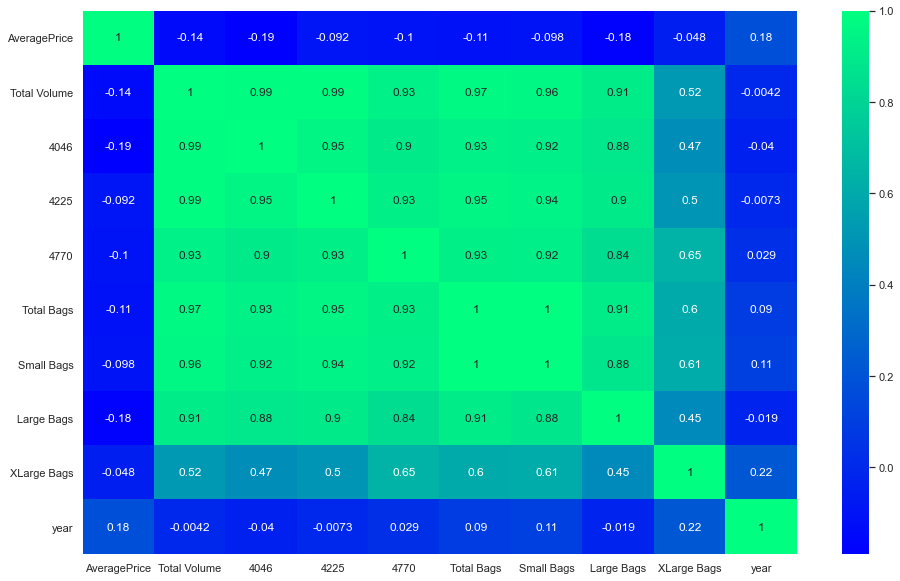

In [53]:
plt.figure(figsize=(16,10))
sns.heatmap(cor,annot=True,cmap="winter")

# DATA VISUALIZATION

# Univariate Analysis

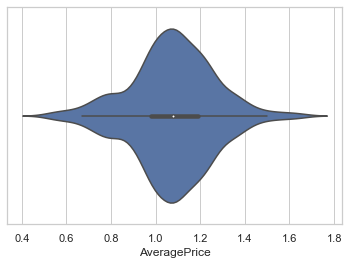

In [54]:
sns.set(style="whitegrid")
sns.violinplot(df["AveragePrice"])
plt.show()

Average Price per piece of avocado is between 1-1.2 dollars. 

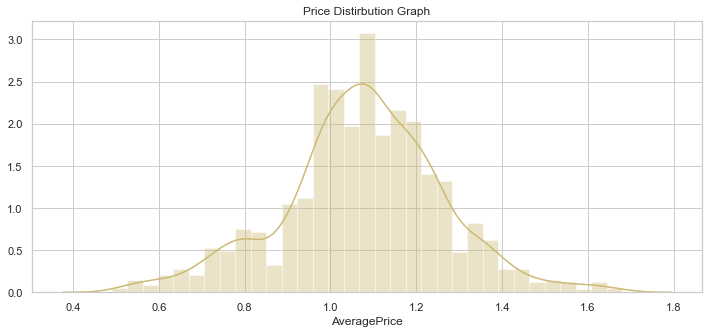

In [55]:
plt.figure(figsize=(12,5))
plt.title("Price Distirbution Graph")
ax = sns.distplot(df["AveragePrice"], color = 'y')

Average Price looks almost normally distribted.

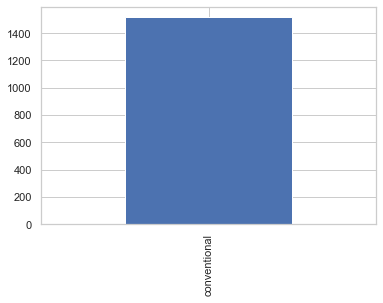

conventional    1517
Name: type, dtype: int64

In [56]:
df.type.value_counts().plot(kind = 'bar')
plt.show()
df.type.value_counts()

#We have only one type of avocado (conventional)

# BiVariate Analysis

Text(0.5, 1.0, 'Average Price')

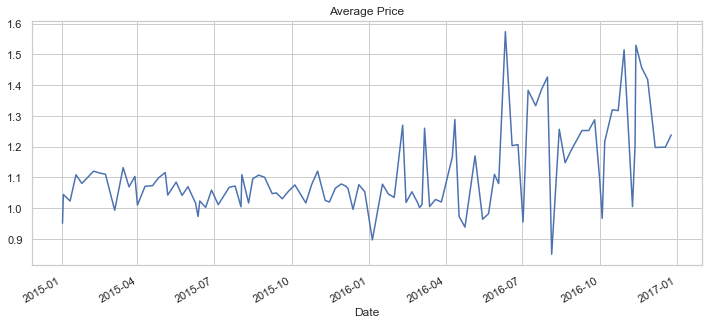

In [57]:
dategroup=df.groupby('Date').mean()
plt.figure(figsize=(12,5))
dategroup['AveragePrice'].plot(x=df.Date)
plt.title('Average Price')

There has been a steep increase in average prices of avocado from July,2016.

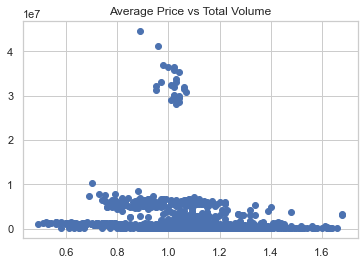

In [58]:
plt.scatter(x="AveragePrice",y="Total Volume",data=df)
plt.title("Average Price vs Total Volume")
plt.show()

Text(0.5, 1.0, 'Average Price of Avocado According to Region')

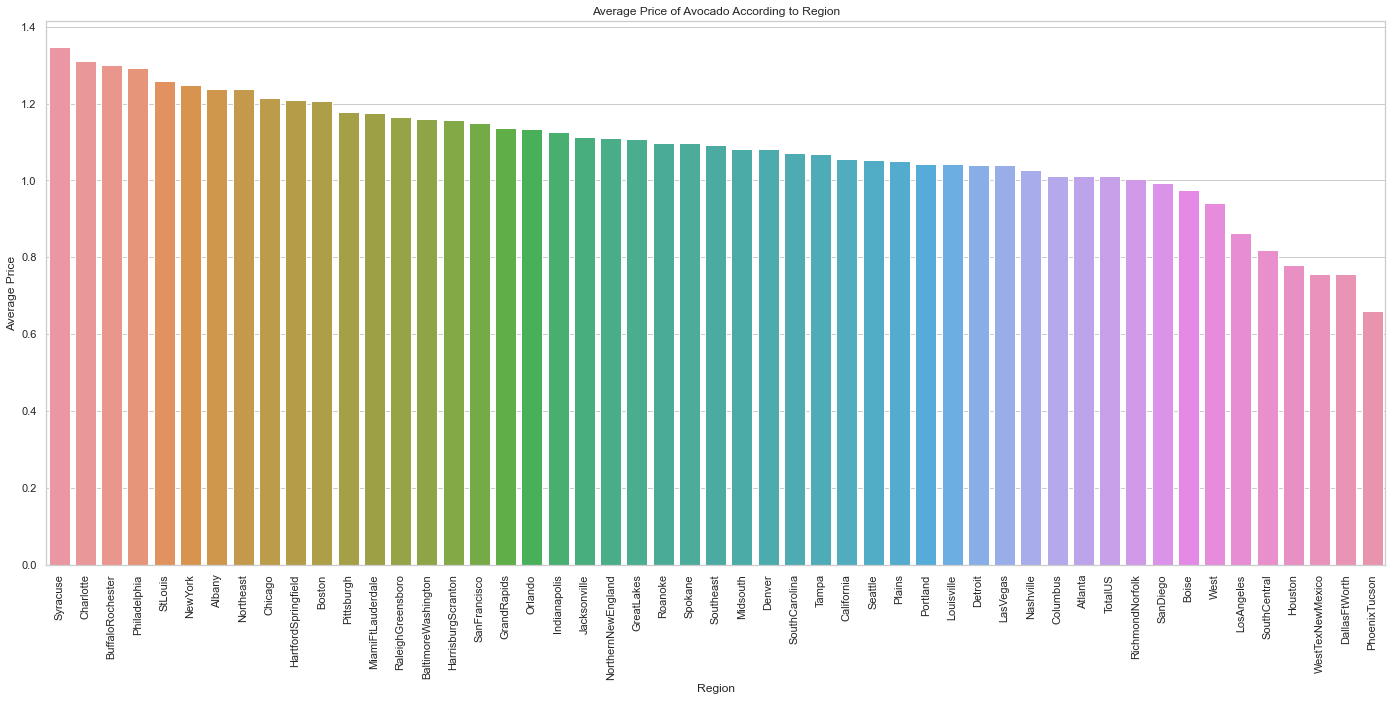

In [59]:
region_list=list(df.region.unique())
average_price=[]

for i in region_list:
    x=df[df.region==i]
    region_average=sum(x.AveragePrice)/len(x)
    average_price.append(region_average)

df1=pd.DataFrame({'region_list':region_list,'average_price':average_price})
new_index=df1.average_price.sort_values(ascending=False).index.values
sorted_data=df1.reindex(new_index)

plt.figure(figsize=(24,10))
ax=sns.barplot(x=sorted_data.region_list,y=sorted_data.average_price)

plt.xticks(rotation=90)
plt.xlabel('Region')
plt.ylabel('Average Price')
plt.title('Average Price of Avocado According to Region')

##Places with highest avocado average price
#Syracuse
#Charlotte
#Buffalo
#Philadelphia

##Places with lowest avocado average price
#Phoenix
#Dallas
#New Mexico
#Houston


# Plotting Outliers

In [60]:
df.shape

(1517, 13)

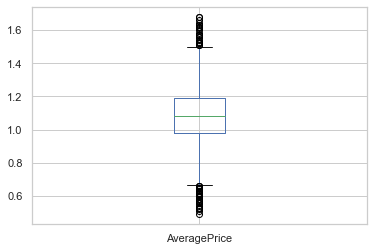

In [61]:
df["AveragePrice"].plot.box()

# Data Pre Processing 

We will be removing unnecessary data which will not be essential for our analysis. First, we will remove the date column as the data is of years 2015-16 and next we will remove the region data as it will increase complexity of the data as there are 52 unique types of region.

In [65]:
df=df.drop(['Date', 'region'], axis=1)

In [66]:
df["type"].unique()

array(['conventional'], dtype=object)

In [67]:
df["year"].unique()

array([2015, 2016], dtype=int64)

In [73]:
df=df.drop(['type'], axis=1)

In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1517 entries, 0 to 1516
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   AveragePrice  1517 non-null   float64
 1   Total Volume  1517 non-null   float64
 2   4046          1517 non-null   float64
 3   4225          1517 non-null   float64
 4   4770          1517 non-null   float64
 5   Total Bags    1517 non-null   float64
 6   Small Bags    1517 non-null   float64
 7   Large Bags    1517 non-null   float64
 8   XLarge Bags   1517 non-null   float64
 9   year          1517 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 118.6 KB


# Removing Skewness

In [75]:
df.skew()

AveragePrice   -0.109444
Total Volume    0.667468
4046           -0.160268
4225            0.184436
4770           -0.355508
Total Bags      0.695502
Small Bags      0.713843
Large Bags     -0.912766
XLarge Bags     0.783913
year            1.828332
dtype: float64

As we know we are dealing with only one type of avocado therefore we will drop the type column and as far as year is concerned we will use one hot encoder for it.

In [71]:
#Label Encoding for year
# Import label encoder 
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
# Encoding categorical columns
df['year']= le.fit_transform(df['year'])
print(df.head())

   AveragePrice  Total Volume     4046       4225    4770  Total Bags  \
0          1.33      64236.62  1036.74   54454.85   48.16     8696.87   
1          1.35      54876.98   674.28   44638.81   58.33     9505.56   
2          0.93     118220.22   794.70  109149.67  130.50     8145.35   
3          1.08      78992.15  1132.00   71976.41   72.58     5811.16   
4          1.28      51039.60   941.48   43838.39   75.78     6183.95   

   Small Bags  Large Bags  XLarge Bags          type  year  
0     8603.62       93.25          0.0  conventional     0  
1     9408.07       97.49          0.0  conventional     0  
2     8042.21      103.14          0.0  conventional     0  
3     5677.40      133.76          0.0  conventional     0  
4     5986.26      197.69          0.0  conventional     0  


In [76]:
#Treating skewness via log method
for col in df.columns:
    if df[col].skew()>1:
        df[col]=np.log1p(df[col])

# Removing Outliers

In [77]:
from scipy.stats import zscore
z=np.abs(zscore(df))
z

array([[1.35048079, 1.35676174, 1.82816171, ..., 0.96674301, 0.81077519,
        0.44100815],
       [1.45639674, 1.46638736, 2.01206913, ..., 0.95386092, 0.81077519,
        0.44100815],
       [0.76783831, 0.9321394 , 1.94183376, ..., 0.93753117, 0.81077519,
        0.44100815],
       ...,
       [2.14485045, 0.64565294, 0.20190426, ..., 0.34275114, 1.10389091,
        2.26753179],
       [2.09189247, 0.60503087, 0.13577946, ..., 0.34346272, 0.81077519,
        2.26753179],
       [1.88006056, 0.62805557, 0.23299293, ..., 0.44343485, 0.81077519,
        2.26753179]])

In [78]:
threshold=3
print(np.where(z>3))

(array([ 760, 1182, 1182, 1182, 1183, 1183, 1183, 1184, 1184, 1184, 1185,
       1185, 1185, 1186, 1186, 1186, 1187, 1188, 1188, 1188, 1189, 1189,
       1191, 1202, 1346, 1411, 1457, 1458], dtype=int64), array([0, 1, 5, 6, 1, 5, 6, 1, 5, 6, 1, 5, 6, 1, 5, 6, 6, 1, 5, 6, 1, 5,
       5, 1, 4, 0, 0, 0], dtype=int64))


In [79]:
df_n=df[(z<3).all(axis=1)]
print("New Shape :",df_n.shape,"Old Shape :",df.shape)

New Shape : (1502, 10) Old Shape : (1517, 10)


# Model Training

In [80]:
#Seperating the input and output data
df_x=df_n.drop(columns="AveragePrice")
y=pd.DataFrame(df_n["AveragePrice"])

In [81]:
#Scaling the data
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(df_x)
x=pd.DataFrame(x,columns=df_x.columns)

In [82]:
#Coverting to train and test data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=42)

In [83]:
#Importing our models library
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor

from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [84]:
#Using algorithms via loop
models= [LinearRegression(),SVR(),DecisionTreeRegressor(),KNeighborsRegressor(),Lasso(), Ridge(), ElasticNet()]
for m in models:
    m.fit(x_train,y_train)
    print("Score of ",m," :",m.score(x_train,y_train))
    predm=m.predict(x_test)
    print('Scores')
    print("Mean_Absolute_Error : ",mean_absolute_error(y_test,predm))
    print("Mean_Squared_Error : ",mean_squared_error(y_test,predm))
    print("Root_Mean_Absolute_Error : ",np.sqrt(mean_absolute_error(y_test,predm)))
    print("r2_score : ",r2_score(y_test,predm))     
    print("--------------------------------------------------------------------------------------------")
    print("\n")

Score of  LinearRegression()  : 0.3780493358425805
Scores
Mean_Absolute_Error :  0.11184679602163691
Mean_Squared_Error :  0.01932869771764725
Root_Mean_Absolute_Error :  0.33443504006254626
r2_score :  0.42695719065049864
--------------------------------------------------------------------------------------------


Score of  SVR()  : 0.7810988102994372
Scores
Mean_Absolute_Error :  0.07346561355253636
Mean_Squared_Error :  0.008943296042243807
Root_Mean_Absolute_Error :  0.271045408654226
r2_score :  0.7348558312745197
--------------------------------------------------------------------------------------------


Score of  DecisionTreeRegressor()  : 1.0
Scores
Mean_Absolute_Error :  0.0748172757475083
Mean_Squared_Error :  0.01086112956810631
Root_Mean_Absolute_Error :  0.27352746799454764
r2_score :  0.6779973337399696
--------------------------------------------------------------------------------------------


Score of  KNeighborsRegressor()  : 0.851023596820141
Scores
Mean_Absolute

We are getting the best result by Decision Tree Method followed by K nearest neighbors method.

In [85]:
#Cross Validation
from sklearn.model_selection import cross_val_score
models= [LinearRegression(),SVR(),DecisionTreeRegressor(),KNeighborsRegressor(),Lasso(), Ridge(), ElasticNet()]
for m in models:
    score=cross_val_score(m,x,y,cv=4,scoring="r2")
    print("Score of ",m," is :",score)
    print("Mean Score : ",score.mean())
    print("Standard Deviation : ",score.std())
    print("--------------------------------------------------------------------------------------------")
    print("\n")

Score of  LinearRegression()  is : [-0.11958327 -0.00780764  0.32848389  0.22295631]
Mean Score :  0.10601232298434377
Standard Deviation :  0.17819781711990307
--------------------------------------------------------------------------------------------


Score of  SVR()  is : [0.18367632 0.4382224  0.47228997 0.06530465]
Mean Score :  0.2898733346837172
Standard Deviation :  0.17102059318945537
--------------------------------------------------------------------------------------------


Score of  DecisionTreeRegressor()  is : [-0.3086304  -0.54749393  0.36664455 -0.0111355 ]
Mean Score :  -0.1251538209666212
Standard Deviation :  0.3416506379661774
--------------------------------------------------------------------------------------------


Score of  KNeighborsRegressor()  is : [-0.17090898  0.03372636  0.34145821  0.34611995]
Mean Score :  0.13759888416279326
Standard Deviation :  0.21852131837270516
----------------------------------------------------------------------------------

By this we conclude that Support Vector Regressor is the model we will be using for our data.

In [86]:
#SVR is the best model so we will find out it's best parameter using GridSearchCV
from sklearn.model_selection import GridSearchCV
K = 5 
sv=SVR()
parameters = [{'kernel': ['rbf'], 'gamma': [1e-4, 1e-3, 0.01, 0.1, 0.2, 0.5, 0.6, 0.9],'C': [1, 10, 100, 1000, 10000]}]
clf=GridSearchCV(sv,parameters)
clf.fit(x,y)
clf.best_params_

{'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}

Best parameters to be used for model are : Alpha =1 & random_state = 42

In [87]:
#Using SVR method with best parameters
sv=SVR(C=10, gamma=0.01, kernel='rbf')
sv.fit(x_train,y_train)
print("Score of : ",sv.score(x_train,y_train))
predsv=sv.predict(x_test)
print('Scores')
print("Mean_Absolute_Error : ",mean_absolute_error(y_test,predsv))
print("Mean_Squared_Error : ",mean_squared_error(y_test,predsv))
print("Root_Mean_Absolute_Error : ",np.sqrt(mean_absolute_error(y_test,predsv)))
print("r2_score : ",r2_score(y_test,predsv))     
print("--------------------------------------------------------------------------------------------")
print("\n")

Score of :  0.6267239050338811
Scores
Mean_Absolute_Error :  0.08585899079315945
Mean_Squared_Error :  0.012448079094189837
Root_Mean_Absolute_Error :  0.29301704863908423
r2_score :  0.630948638167868
--------------------------------------------------------------------------------------------




In [88]:
#Cross Validaiting SVR
score=cross_val_score(sv,x,y,cv=4,scoring="r2")
print("Score is :",score)
print("Mean Score : ",score.mean())
print("Standard Deviation : ",score.std())
print("--------------------------------------------------------------------------------------------")
print("\n")

Score is : [0.23922407 0.40080599 0.49547158 0.19872464]
Mean Score :  0.3335565699431796
Standard Deviation :  0.12022606358665076
--------------------------------------------------------------------------------------------




As the score is still very low we will try to boost it by using Ensemble Methods

# Ensemble Methods

In [89]:
#Random Forest
from sklearn.ensemble import RandomForestRegressor

rf=RandomForestRegressor(n_estimators=20,random_state=59)
rf.fit(x_train,y_train)
predrf=rf.predict(x_test)
print("r2_score : ",rf.score(x_train,y_train))
print("mean_absolute_error : ",mean_absolute_error(y_test,predrf))
print("mean_squared_error : ",mean_squared_error(y_test,predrf))

r2_score :  0.9678536929929197
mean_absolute_error :  0.058200996677740875
mean_squared_error :  0.0061518546511627895


In [90]:
from sklearn.ensemble import AdaBoostRegressor

ad=AdaBoostRegressor(n_estimators=20,random_state=59)
ad.fit(x_train,y_train)
predad=ad.predict(x_test)
print("r2_score : ",ad.score(x_train,y_train))
print("mean_absolute_error : ",mean_absolute_error(y_test,predad))
print("mean_squared_error : ",mean_squared_error(y_test,predad))

r2_score :  0.6121429580611907
mean_absolute_error :  0.08957038159462719
mean_squared_error :  0.012572577232936349


As Random Forest Regressor is giving best results we will be saving it using serialization

In [91]:
#Saving the best model : RandomForest Model
import joblib
joblib.dump(rf,"Avocado.pkl")

['Avocado.pkl']